In [ ]:
options(scipen=999)  # turn off scientific notation like 1e+06

In [ ]:
install.packages("dplyr")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
df = read.csv("COVID19_India.csv")

In [ ]:
head(df)

,Sno,Date,Time,State.UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,1,30-01-2020,6:00 PM,Kerala,1,0,0,0,1
2,2,31-01-2020,6:00 PM,Kerala,1,0,0,0,1
3,3,01-02-2020,6:00 PM,Kerala,2,0,0,0,2
4,4,02-02-2020,6:00 PM,Kerala,3,0,0,0,3
5,5,03-02-2020,6:00 PM,Kerala,3,0,0,0,3
6,6,04-02-2020,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
colSums(is.na(df))

Sno                     Date                     Time 
                       0                        0                        0 
    State.UnionTerritory  ConfirmedIndianNational ConfirmedForeignNational 
                       0                        0                        0 
                   Cured                   Deaths                Confirmed 
                       0                        0                        0

In [ ]:
summary(df)

      Sno            Date               Time           State.UnionTerritory
 Min.   :    1   Length:18110       Length:18110       Length:18110        
 1st Qu.: 4528   Class :character   Class :character   Class :character    
 Median : 9056   Mode  :character   Mode  :character   Mode  :character    
 Mean   : 9056                                                             
 3rd Qu.:13583                                                             
 Max.   :18110                                                             
 ConfirmedIndianNational ConfirmedForeignNational     Cured        
 Length:18110            Length:18110             Min.   :      0  
 Class :character        Class :character         1st Qu.:   3360  
 Mode  :character        Mode  :character         Median :  33364  
                                                  Mean   : 278638  
                                                  3rd Qu.: 278870  
                                                  Max.   :61

In [ ]:
str(df)

'data.frame':	18110 obs. of  9 variables:
 $ Sno                     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date                    : chr  "30-01-2020" "31-01-2020" "01-02-2020" "02-02-2020" ...
 $ Time                    : chr  "6:00 PM" "6:00 PM" "6:00 PM" "6:00 PM" ...
 $ State.UnionTerritory    : chr  "Kerala" "Kerala" "Kerala" "Kerala" ...
 $ ConfirmedIndianNational : chr  "1" "1" "2" "3" ...
 $ ConfirmedForeignNational: chr  "0" "0" "0" "0" ...
 $ Cured                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Deaths                  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Confirmed               : int  1 1 2 3 3 3 3 3 3 3 ...


### Showing the Deaths larger then 50000 over all states in india

In [ ]:
unique(df$ConfirmedIndianNational)

[1] "1"   "2"   "3"   "0"   "6"   "7"   "8"   "9"   "4"   "15"  "5"   "17" 
[13] "10"  "11"  "19"  "14"  "22"  "32"  "12"  "23"  "24"  "36"  "25"  "39" 
[25] "44"  "18"  "16"  "26"  "49"  "33"  "60"  "13"  "28"  "45"  "64"  "21" 
[37] "29"  "71"  "30"  "37"  "87"  "86"  "41"  "101" "125" "34"  "35"  "42" 
[49] "55"  "110" "20"  "121" "40"  "129" "127" "38"  "168" "177" "52"  "46" 
[61] "54"  "-"

In [ ]:
df$ConfirmedIndianNational<-gsub("-","0",as.character(df$ConfirmedIndianNational))
unique(df$ConfirmedIndianNational)

[1] "1"   "2"   "3"   "0"   "6"   "7"   "8"   "9"   "4"   "15"  "5"   "17" 
[13] "10"  "11"  "19"  "14"  "22"  "32"  "12"  "23"  "24"  "36"  "25"  "39" 
[25] "44"  "18"  "16"  "26"  "49"  "33"  "60"  "13"  "28"  "45"  "64"  "21" 
[37] "29"  "71"  "30"  "37"  "87"  "86"  "41"  "101" "125" "34"  "35"  "42" 
[49] "55"  "110" "20"  "121" "40"  "129" "127" "38"  "168" "177" "52"  "46" 
[61] "54"

In [ ]:
df$ConfirmedForeignNational<-gsub("-","0",as.character(df$ConfirmedForeignNational))
unique(df$ConfirmedForeignNational)

[1] "0"  "1"  "2"  "14" "3"  "9"  "7"  "11" "10" "8"  "6"

In [ ]:
#Change the data type
df$ConfirmedIndianNational = as.numeric(as.character(df$ConfirmedIndianNational))
str(df)

'data.frame':	18110 obs. of  9 variables:
 $ Sno                     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date                    : chr  "30-01-2020" "31-01-2020" "01-02-2020" "02-02-2020" ...
 $ Time                    : chr  "6:00 PM" "6:00 PM" "6:00 PM" "6:00 PM" ...
 $ State.UnionTerritory    : chr  "Kerala" "Kerala" "Kerala" "Kerala" ...
 $ ConfirmedIndianNational : num  1 1 2 3 3 3 3 3 3 3 ...
 $ ConfirmedForeignNational: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Cured                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Deaths                  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Confirmed               : int  1 1 2 3 3 3 3 3 3 3 ...


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Use of `df$State.UnionTerritory` is discouraged.
ℹ Use `State.UnionTerritory` instead.”
Warning message:
“Use of `df$State.UnionTerritory` is discouraged.
ℹ Use `State.UnionTerritory` instead.”
`geom_smooth()` using formula = 'y ~ x'


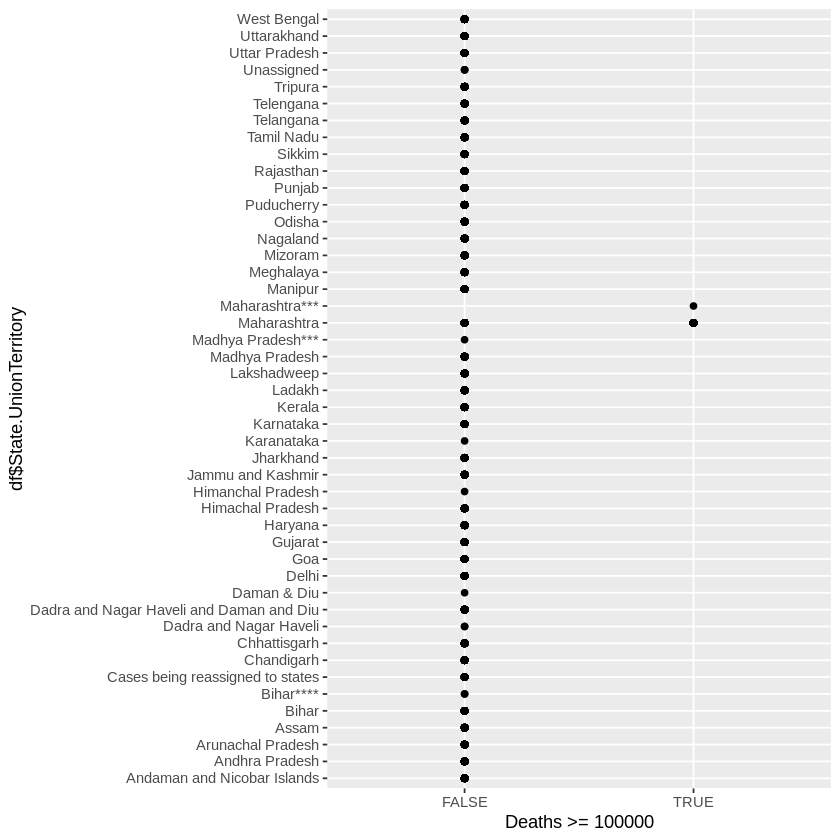

In [ ]:
ggplot(df, aes(x = Deaths >= 100000, y = df$State.UnionTerritory)) + geom_point() + geom_smooth(method="lm", col="firebrick", size=2)

In [ ]:
dim(df)

[1] 18110     9

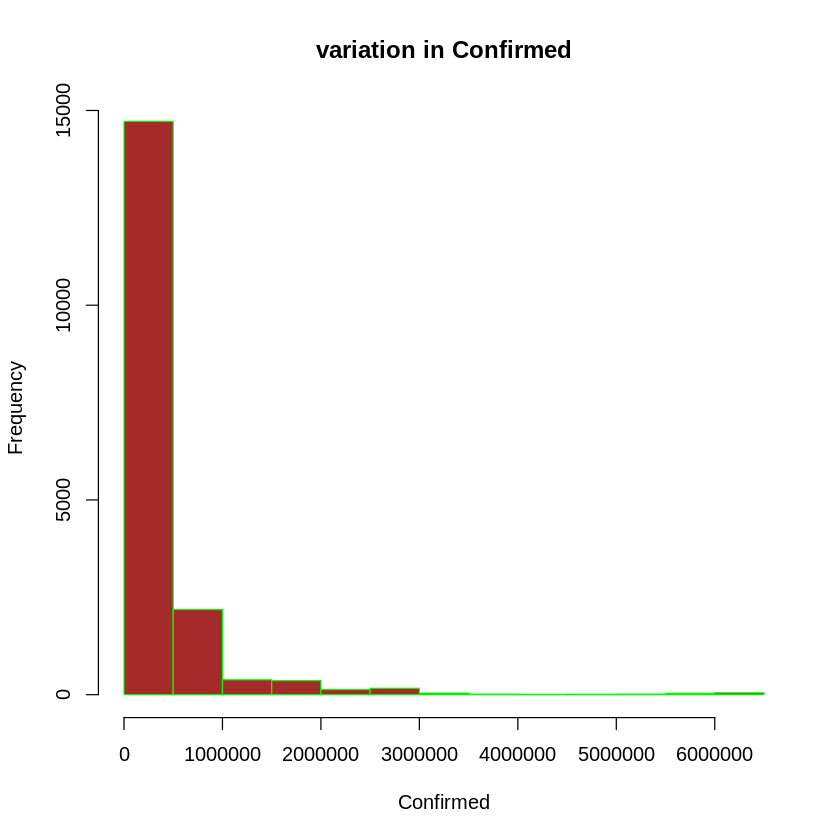

In [86]:
hist(df$Confirmed, ,main="variation in Confirmed",xlab="Confirmed",freq=TRUE,col="Brown",border="green")

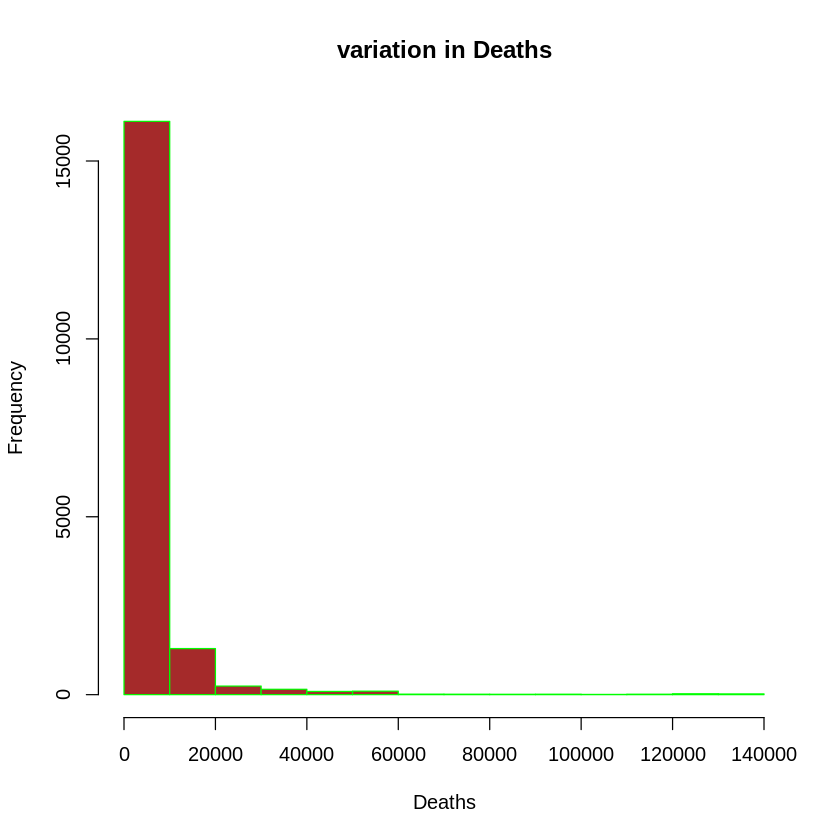

In [87]:
hist(df$Deaths, ,main="variation in Deaths",xlab="Deaths",freq=TRUE,col="Brown",border="green")

# Selecting the particular State


In [ ]:
subset(df, subset = State.UnionTerritory == "Maharashtra")

,Sno,Date,Time,State.UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>
77,77,09-03-2020,6:00 PM,Maharashtra,2,0,0,0,2
92,92,10-03-2020,6:00 PM,Maharashtra,5,0,0,0,5
98,98,11-03-2020,6:00 PM,Maharashtra,2,0,0,0,2
121,121,12-03-2020,6:00 PM,Maharashtra,11,0,0,0,11
134,134,13-03-2020,6:00 PM,Maharashtra,14,0,0,0,14
147,147,14-03-2020,6:00 PM,Maharashtra,14,0,0,0,14
154,154,15-03-2020,6:00 PM,Maharashtra,32,0,0,0,32
168,168,16-03-2020,6:00 PM,Maharashtra,32,0,0,0,32
183,183,17-03-2020,6:00 PM,Maharashtra,36,3,0,1,39


In [ ]:
sample_frac(df,0.8)

Sno,Date,Time,State.UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>
9767,23-12-2020,8:00 AM,Delhi,0,0,599683,10329,618747
4620,29-07-2020,8:00 AM,Madhya Pradesh,0,0,20343,830,29217
10650,16-01-2021,8:00 AM,Punjab,0,0,161967,5485,170191
8239,09-11-2020,8:00 AM,Uttarakhand,0,0,60242,1065,65279
6597,24-09-2020,8:00 AM,Andaman and Nicobar Islands,0,0,3494,52,3712
5366,19-08-2020,8:00 AM,Tamil Nadu,0,0,289787,6007,349654
9955,28-12-2020,8:00 AM,Kerala,0,0,672196,2976,740516
236,20-03-2020,6:00 PM,Maharashtra,49,3,0,1,52
8240,09-11-2020,8:00 AM,Uttar Pradesh,0,0,467108,7206,497563


In [ ]:
#Shows the largest confirmed cases in india
subset(df, subset = Confirmed == max(Confirmed))

,Sno,Date,Time,State.UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>
18095,18095,11-08-2021,8:00 AM,Maharashtra,0,0,6159676,134201,6363442


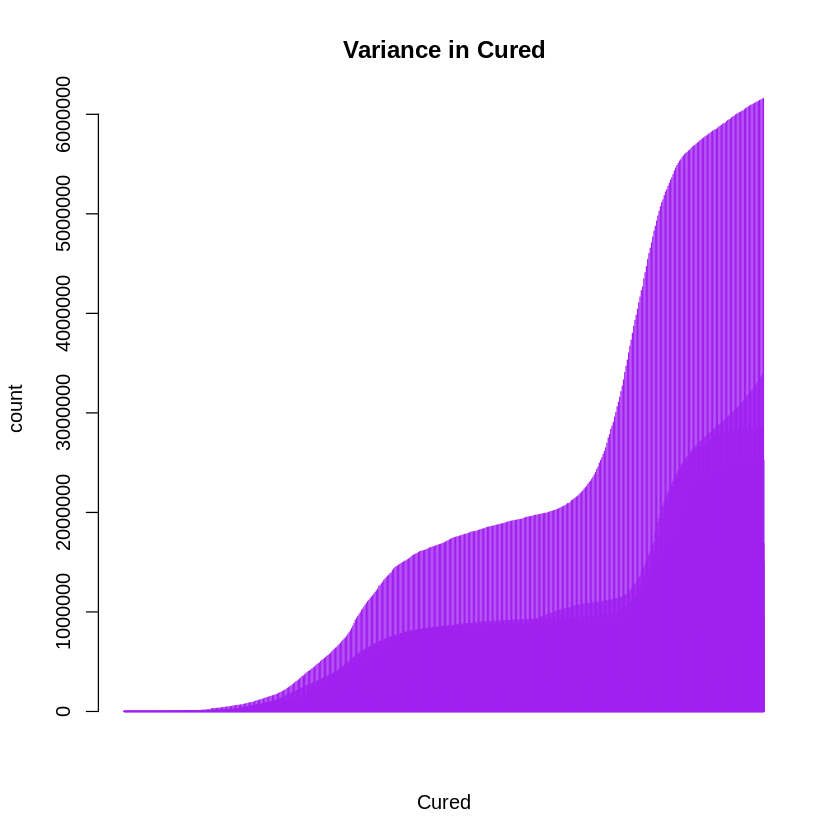

In [91]:
barplot(df$Cured,main="Variance in Cured",xlab="Cured",ylab="count",col="green",border = "purple")

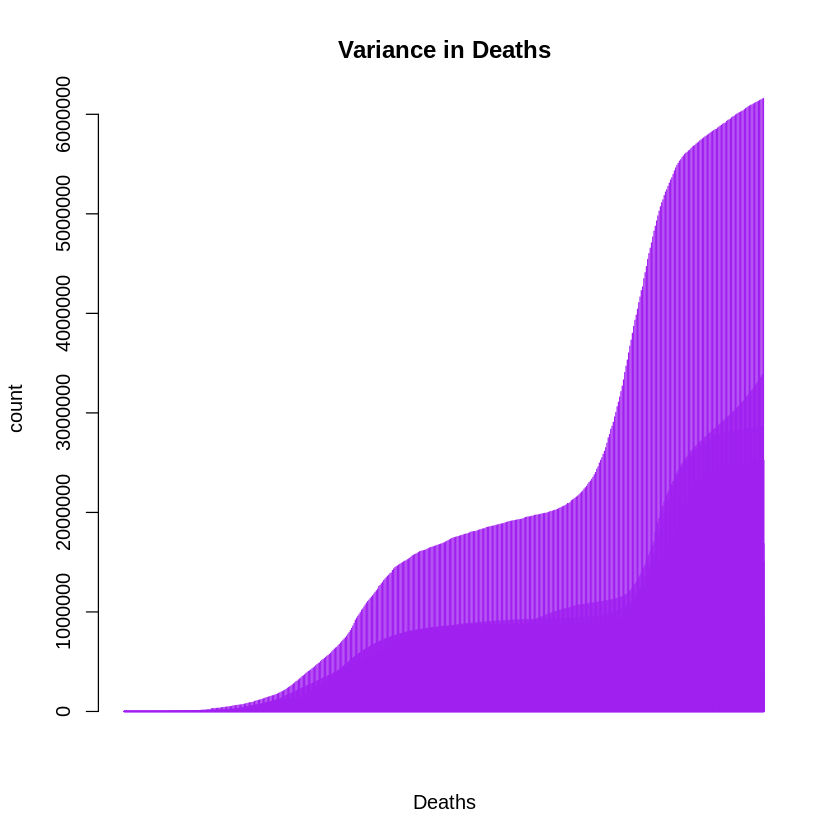

In [92]:
barplot(df$Cured,main="Variance in Deaths",xlab="Deaths",ylab="count",col="green",border = "purple")

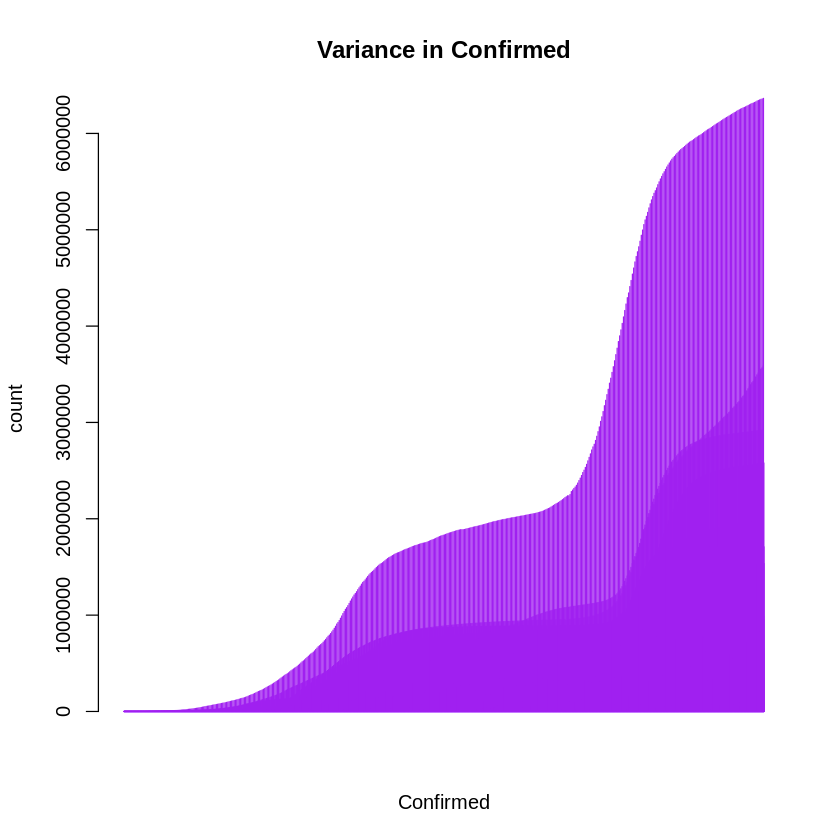

In [95]:
barplot(df$Confirmed,main="Variance in Confirmed",xlab="Confirmed",ylab="count",col="green",border = "purple")

In [97]:
max(df$Deaths)

[1] 134201

In [98]:
max(df$Cured)

[1] 6159676

In [106]:
max(df$Cured)-max(df$Deaths)

[1] 6025475

# Hence analysing from the dataset we carried out that many of patients had cured and less number of peoples had death due to covid.